# ===========================================================

In [ ]:
import numpy as np
from ipywidgets import interact, widgets
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import optimizers
from keras import Model
from keras.utils import to_categorical
from tqdm import tqdm

images = []  # untuk menyimpan gambar yang akan diproses dalam bentuk list
species = [] # untuk menyimpan nama spesies dari gambar dalam bentuk list

folderin = os.listdir('filtered df') # path untuk folder gambar

# perulangan untuk setiap folder dalam folder "folderin"
for folder in folderin:
    folder_path = os.path.join('filtered df', folder)

    # daftar file (gambar) di dalam setiap folder
    dir = os.listdir(folder_path)

    # perulangan untuk setiap gambar di dalam folder
    for image_name in dir:
        # memasukkan nama folder (spesies) ke dalam list species
        species.append(folder)

        # membaca gambar dan mengkonversi menjadi RGB
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path).convert('RGB')

        # mengubah ukuran gambar menjadi 299*299
        image = np.asarray(image.resize((300, 300)))

        # normalisasi piksel gambar ke dalam rentang 0 - 1
        image = image / 255

        # memasukkan gambar yang telah diproses ke dalam list 'images'
        images.append(image)

# Output unik dari nama folder (kelas)
unique_labels = np.unique(species)
print(unique_labels)

# Output total gambar yang diproses
print(f"Total gambar: {len(images)}")


['0' '1' '2' '3' '4']
Total gambar: 1049


In [ ]:
#Code dibawah ini untuk mencari jumlah image dari setiap kelas

folder_path = 'filtered df'
folder_list = os.listdir(folder_path)

for folder in folder_list:
    folder_path_full = os.path.join(folder_path, folder)
    if os.path.isdir(folder_path_full):
        file_count = len([file for file in os.listdir(folder_path_full) if os.path.isfile(os.path.join(folder_path_full, file))])
        print(f'Folder "{folder}" memiliki {file_count} file.')


Folder "0" memiliki 234 file.
Folder "1" memiliki 110 file.
Folder "2" memiliki 177 file.
Folder "3" memiliki 404 file.
Folder "4" memiliki 124 file.


In [ ]:
def showimage(imageno):
    # mengubah ukuran gambar menjadi 5*5
    plt.figure(figsize=(5,5))
    # menampilkan gambar
    plt.imshow(images[imageno])

In [ ]:
# fungsi intereact digunakan untuk membuat elemen iteraktif seperti slider.
interact(showimage,
    imageno=widgets.IntSlider(min=0,max=1049,step=1,value=0))

In [ ]:
uniquelabel = np.unique(species) # mencari label yang unik di spesies

label_to_int = {}  # Create a dictionary to map labels to integers

# perulangan untuk mengubah label dari kategori menjadi angka
for i in range(len(uniquelabel)):
    replace = uniquelabel[i]
    label_to_int[replace] = i

print(label_to_int)

species_as_int = [label_to_int[label] for label in species]

print(species_as_int)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
one_hot_species = to_categorical(species, 5)
print(one_hot_species)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
images=np.array(images)
labels=np.array(one_hot_species)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.25, random_state=32)
# Checking the shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(786, 300, 300, 3)
(263, 300, 300, 3)
(786, 5)
(263, 5)


# Inception V3

## library

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(5, activation='softmax')(x)

model_inception = tf.keras.models.Model(base_model.input, x)

model_inception.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
history_inception = model_inception.fit(X_train, Y_train, batch_size=20, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
40/40 [==============================] - 363s 9s/step - loss: 42.3730 - accuracy: 0.4547 - precision: 0.4565 - recall: 0.4496 - f1_score: 0.4146 - val_loss: 5.9454 - val_accuracy: 0.6566 - val_precision: 0.6591 - val_recall: 0.6566 - val_f1_score: 0.6371
Epoch 2/8
40/40 [==============================] - 366s 9s/step - loss: 2.6189 - accuracy: 0.7909 - precision: 0.7909 - recall: 0.7909 - f1_score: 0.7865 - val_loss: 2.9466 - val_accuracy: 0.7057 - val_precision: 0.7165 - val_recall: 0.7057 - val_f1_score: 0.6540
Epoch 3/8
40/40 [==============================] - 367s 9s/step - loss: 0.7983 - accuracy: 0.9030 - precision: 0.9062 - recall: 0.9005 - f1_score: 0.8900 - val_loss: 2.2018 - val_accuracy: 0.7698 - val_precision: 0.7727 - val_recall: 0.7698 - val_f1_score: 0.7489
Epoch 4/8
40/40 [==============================] - 345s 9s/step - loss: 0.3369 - accuracy: 0.9421 - precision: 0.9433 - recall: 0.9421 - f1_score: 0.9398 - val_loss: 2.6612 - val_accuracy: 0.7509 - val_preci

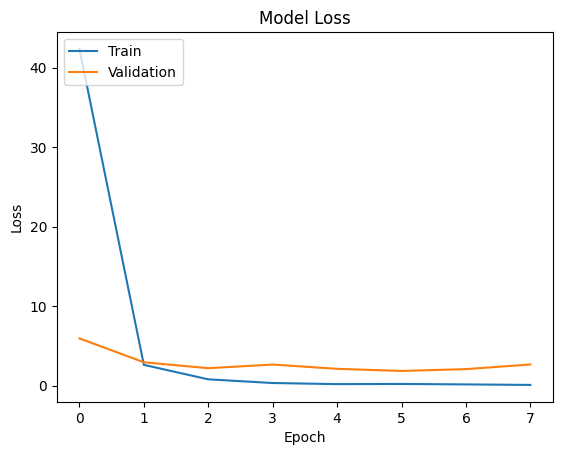

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# ResNet50

## library

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras import metrics
import tensorflow as tf

# Load ResNet50 with imagenet weights
base_model = ResNet50(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base_model
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 1024 units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout layer with dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final dense layer with 5 units for classification output using softmax activation
x = layers.Dense(5, activation='softmax')(x)

# Create the model
model_resnet = tf.keras.models.Model(base_model.input, x)

# Compile the model with categorical crossentropy loss and additional metrics
model_resnet.compile(optimizer="adam", loss='categorical_crossentropy',
                     metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])

94765736/94765736 [==============================] - 119s 1us/step


In [ ]:
history_resnet = model_resnet.fit(X_train, Y_train, batch_size=20, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8

40/40 [==============================] - 573s 14s/step - loss: 48.0208 - accuracy: 0.2583 - precision_2: 0.2597 - recall_2: 0.2557 - f1_score: 0.2082 - val_loss: 5.7950 - val_accuracy: 0.3650 - val_precision_2: 0.3659 - val_recall_2: 0.3422 - val_f1_score: 0.2369
Epoch 2/8
40/40 [==============================] - 600s 15s/step - loss: 5.3763 - accuracy: 0.2926 - precision_2: 0.3006 - recall_2: 0.2417 - f1_score: 0.2299 - val_loss: 1.5198 - val_accuracy: 0.4030 - val_precision_2: 0.6667 - val_recall_2: 0.0304 - val_f1_score: 0.2094
Epoch 3/8
40/40 [==============================] - 596s 15s/step - loss: 1.5598 - accuracy: 0.3422 - precision_2: 0.5217 - recall_2: 0.0611 - f1_score: 0.1934 - val_loss: 1.5078 - val_accuracy: 0.3802 - val_precision_2: 0.8462 - val_recall_2: 0.0418 - val_f1_score: 0.1102
Epoch 4/8
40/40 [==============================] - 563s 14s/step - loss: 1.4993 - accuracy: 0.3842 - precision_2: 0.5763 - recall_2: 0.0865 - f1_score: 0.1577 - val_loss: 1.5341 -

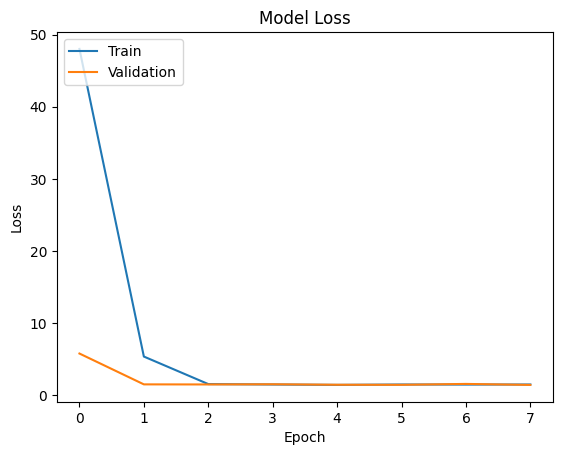

In [ ]:
# Plot grafik loss untuk setiap epoch
import matplotlib.pyplot as plt

plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras import layers
from tensorflow.keras import metrics
import tensorflow as tf

# Load ResNet50 with imagenet weights
base_model = ResNet152V2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base_model
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 1024 units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout layer with dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final dense layer with 5 units for classification output using softmax activation
x = layers.Dense(5, activation='softmax')(x)

# Create the model
model_resnet_152v2 = tf.keras.models.Model(base_model.input, x)

# Compile the model with categorical crossentropy loss and additional metrics
model_resnet_152v2.compile(optimizer="adam", loss='categorical_crossentropy',
                     metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])



234545216/234545216 [==============================] - 256s 1us/step



In [ ]:
history_resnet_152v2 = model_resnet_152v2.fit(X_train, Y_train, batch_size=20, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8


40/40 [==============================] - 1145s 28s/step - loss: 37.4918 - accuracy: 0.5458 - precision: 0.5473 - recall: 0.5445 - f1_score: 0.4940 - val_loss: 6.9792 - val_accuracy: 0.7300 - val_precision: 0.7300 - val_recall: 0.7300 - val_f1_score: 0.7047
Epoch 2/8
40/40 [==============================] - 873s 22s/step - loss: 1.6314 - accuracy: 0.8944 - precision: 0.8944 - recall: 0.8944 - f1_score: 0.8919 - val_loss: 3.9436 - val_accuracy: 0.7947 - val_precision: 0.7977 - val_recall: 0.7947 - val_f1_score: 0.7797
Epoch 3/8
40/40 [==============================] - 913s 23s/step - loss: 0.3535 - accuracy: 0.9593 - precision: 0.9593 - recall: 0.9593 - f1_score: 0.9542 - val_loss: 4.2494 - val_accuracy: 0.7681 - val_precision: 0.7681 - val_recall: 0.7681 - val_f1_score: 0.7463
Epoch 4/8
40/40 [==============================] - 932s 23s/step - loss: 0.4088 - accuracy: 0.9771 - precision: 0.9771 - recall: 0.9771 - f1_score: 0.9766 - val_loss: 3.8108 - val_accuracy: 0.7643 - va

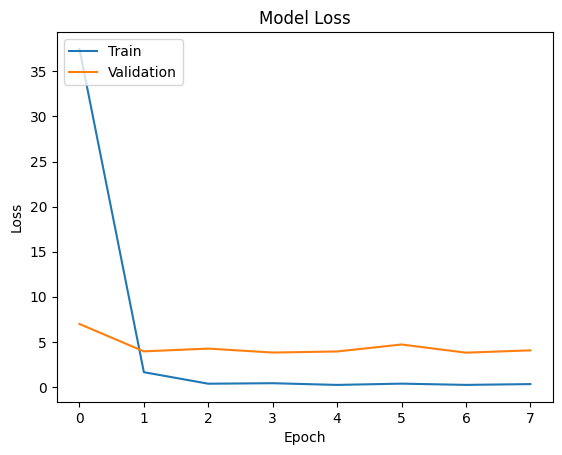

In [ ]:
# Plot grafik loss untuk setiap epoch
import matplotlib.pyplot as plt

plt.plot(history_resnet_152v2.history['loss'])
plt.plot(history_resnet_152v2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras import metrics
import tensorflow as tf

# Load MobileNetV2 with imagenet weights
base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base_model
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 1024 units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout layer with dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final dense layer with 5 units for classification output using softmax activation
x = layers.Dense(5, activation='softmax')(x)

# Create the model
model_mobilenet_v2 = tf.keras.models.Model(base_model.input, x)

# Compile the model with categorical crossentropy loss and additional metrics
model_mobilenet_v2.compile(optimizer="adam", loss='categorical_crossentropy',
                           metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])




9406464/9406464 [==============================] - 8s 1us/step



In [ ]:
history_mobilenetv2 = model_mobilenet_v2.fit(X_train, Y_train, batch_size=20, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8


40/40 [==============================] - 168s 4s/step - loss: 38.3319 - accuracy: 0.4835 - precision: 0.4853 - recall: 0.4822 - f1_score: 0.4278 - val_loss: 9.3771 - val_accuracy: 0.5057 - val_precision: 0.5057 - val_recall: 0.5057 - val_f1_score: 0.4943
Epoch 2/8
40/40 [==============================] - 114s 3s/step - loss: 2.2148 - accuracy: 0.8130 - precision: 0.8151 - recall: 0.8079 - f1_score: 0.8123 - val_loss: 2.5758 - val_accuracy: 0.6692 - val_precision: 0.6770 - val_recall: 0.6616 - val_f1_score: 0.6437
Epoch 3/8
40/40 [==============================] - 109s 3s/step - loss: 0.4899 - accuracy: 0.9249 - precision: 0.9308 - recall: 0.9237 - f1_score: 0.9198 - val_loss: 2.0033 - val_accuracy: 0.7376 - val_precision: 0.7560 - val_recall: 0.7186 - val_f1_score: 0.7065
Epoch 4/8
40/40 [==============================] - 106s 3s/step - loss: 0.1703 - accuracy: 0.9682 - precision: 0.9682 - recall: 0.9682 - f1_score: 0.9651 - val_loss: 1.8962 - val_accuracy: 0.7148 - val_pre

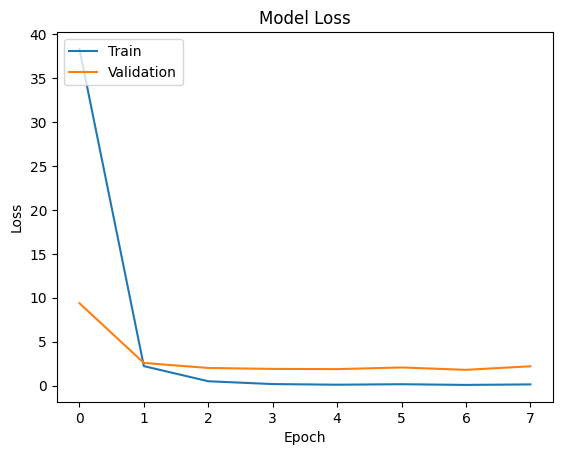

In [ ]:
# Plot grafik loss untuk setiap epoch
import matplotlib.pyplot as plt

plt.plot(history_mobilenetv2.history['loss'])
plt.plot(history_mobilenetv2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras import metrics
import tensorflow as tf

# Load MobileNetV2 with imagenet weights
base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add layers after some bottleneck blocks
x = base_model.get_layer('block_6_project_BN').output  # Adjust the layer name based on your preference
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# Add more layers after Global Average Pooling
y = base_model.output
y = layers.GlobalAveragePooling2D()(y)
y = layers.Dense(512, activation='relu')(y)
y = layers.Dropout(0.3)(y)
y = layers.Dense(256, activation='relu')(y)
y = layers.Dropout(0.3)(y)

# Concatenate the two branches
merged = layers.concatenate([x, y])

# Final dense layer for classification output
predictions = layers.Dense(5, activation='softmax')(merged)

# Create the model
model_mobilenet_v2_modif = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with categorical crossentropy loss and additional metrics
model_mobilenet_v2_modif.compile(optimizer="adam", loss='categorical_crossentropy',
                           metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])

In [ ]:
history_mobilenetv2_modif = model_mobilenet_v2_modif.fit(X_train, Y_train, batch_size=20, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
40/40 [==============================] - 47s 1s/step - loss: 1.3764 - accuracy: 0.4656 - precision_1: 0.5495 - recall_1: 0.3461 - f1_score: 0.4078 - val_loss: 0.9982 - val_accuracy: 0.6692 - val_precision_1: 0.7840 - val_recall_1: 0.4829 - val_f1_score: 0.6349
Epoch 2/8
40/40 [==============================] - 32s 796ms/step - loss: 0.9409 - accuracy: 0.6463 - precision_1: 0.7253 - recall_1: 0.5611 - f1_score: 0.6134 - val_loss: 1.1564 - val_accuracy: 0.5589 - val_precision_1: 0.5915 - val_recall_1: 0.5285 - val_f1_score: 0.4559
Epoch 3/8
40/40 [==============================] - 32s 816ms/step - loss: 0.7855 - accuracy: 0.7099 - precision_1: 0.7868 - recall_1: 0.6387 - f1_score: 0.6851 - val_loss: 0.7611 - val_accuracy: 0.7072 - val_precision_1: 0.8058 - val_recall_1: 0.6312 - val_f1_score: 0.6838
Epoch 4/8
40/40 [==============================] - 30s 759ms/step - loss: 0.6147 - accuracy: 0.7697 - precision_1: 0.8304 - recall_1: 0.7163 - f1_score: 0.7531 - val_loss: 0.7491 - 

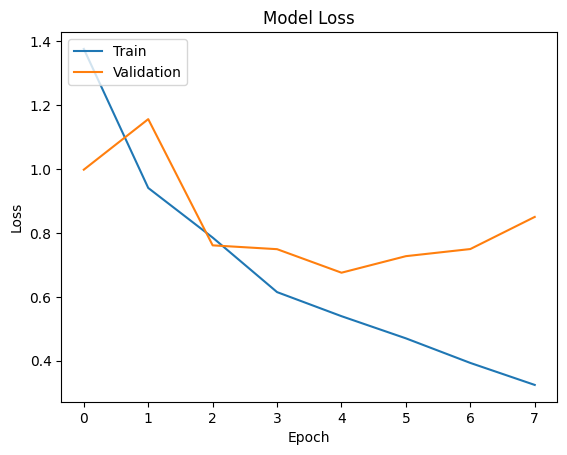

In [ ]:
# Plot grafik loss untuk setiap epoch
import matplotlib.pyplot as plt

plt.plot(history_mobilenetv2_modif.history['loss'])
plt.plot(history_mobilenetv2_modif.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Modifikasi InceptionV3

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf

# Load InceptionV3 with imagenet weights
base_model = InceptionV3(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add layers after some inception blocks
x = base_model.get_layer('mixed7').output  # Adjust the layer name based on your preference
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# Add more layers after Global Average Pooling
y = base_model.output
y = layers.GlobalAveragePooling2D()(y)
y = layers.Dense(512, activation='relu')(y)
y = layers.Dropout(0.3)(y)
y = layers.Dense(256, activation='relu')(y)
y = layers.Dropout(0.3)(y)

# Concatenate the two branches
merged = layers.concatenate([x, y])

# Final dense layer for classification output
predictions = layers.Dense(5, activation='softmax')(merged)

# Create the model
model_inception_modif = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with categorical crossentropy loss and additional metrics
model_inception_modif.compile(optimizer="adam", loss='categorical_crossentropy',
                        metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])


In [ ]:
history_inception_modif = model_inception_modif.fit(X_train, Y_train, batch_size=20, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
40/40 [==============================] - 74s 2s/step - loss: 1.2797 - accuracy: 0.4847 - precision_2: 0.6234 - recall_2: 0.3181 - f1_score: 0.3697 - val_loss: 1.1525 - val_accuracy: 0.5551 - val_precision_2: 0.6384 - val_recall_2: 0.4297 - val_f1_score: 0.4478
Epoch 2/8
40/40 [==============================] - 58s 1s/step - loss: 1.0031 - accuracy: 0.6170 - precision_2: 0.7247 - recall_2: 0.5191 - f1_score: 0.5484 - val_loss: 0.9536 - val_accuracy: 0.6768 - val_precision_2: 0.8473 - val_recall_2: 0.4221 - val_f1_score: 0.6776
Epoch 3/8
40/40 [==============================] - 96s 2s/step - loss: 0.7455 - accuracy: 0.7379 - precision_2: 0.8242 - recall_2: 0.6145 - f1_score: 0.7017 - val_loss: 0.9498 - val_accuracy: 0.6084 - val_precision_2: 0.6936 - val_recall_2: 0.4563 - val_f1_score: 0.6063
Epoch 4/8
40/40 [==============================] - 57s 1s/step - loss: 0.6674 - accuracy: 0.7557 - precision_2: 0.8216 - recall_2: 0.6679 - f1_score: 0.7382 - val_loss: 0.9325 - val_accur

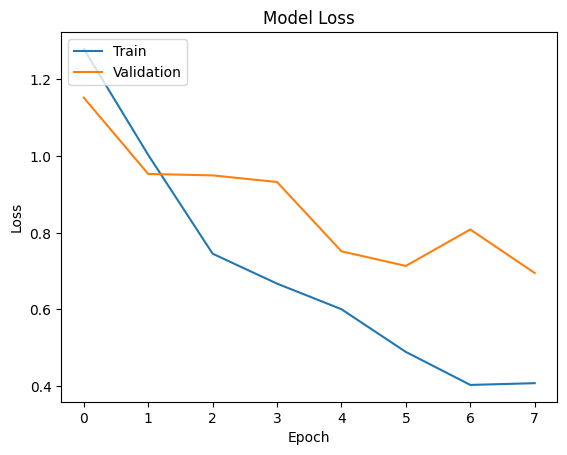

In [ ]:
# Plot grafik loss untuk setiap epoch
import matplotlib.pyplot as plt

plt.plot(history_inception_modif.history['loss'])
plt.plot(history_inception_modif.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(file_path, model, unique_labels):
    # Membaca gambar dan mengubahnya ke dalam bentuk yang dapat diproses oleh model
    img = image.load_img(file_path, target_size=(300, 300))  # Sesuaikan dengan ukuran input model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi

    # Melakukan prediksi menggunakan model
    predictions = model.predict(img_array)

    # Mendapatkan indeks kelas dengan nilai probabilitas tertinggi
    predicted_class_index = np.argmax(predictions[0])

    # Mencetak hasil prediksi
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted class: {unique_labels[predicted_class_index]}")
    print(f"Class probabilities: {predictions[0]}")

# Ganti path file di bawah dengan path gambar yang ingin Anda prediksi
file_path_to_predict = 'filtered df/3/image_1099.jpg'
predict_image(file_path_to_predict, model_inception_modif, unique_labels)


1/1 [==============================] - 1s 1s/step
Predicted class index: 3
Predicted class: 3
Class probabilities: [0.11229062 0.00944042 0.02139982 0.8099113  0.04695779]
